In [1]:
from __future__ import division
from StringIO import StringIO
#import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from xml.dom import minidom
import matplotlib as plt
from plotly.graph_objs import *
import itertools
import plotly.plotly as py
from plotly.graph_objs import *
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline   

In [2]:
xmldoc = minidom.parse('crime_incidents_2013_plain.xml')
itemlist = xmldoc.getElementsByTagName('dcst:ReportedCrime')

In [3]:
OF=[]
Wards=[]
Dates=[]
Streets=[]
Shift=[]

wards=['Ward1','Ward2','Ward3','Ward4','Ward5','Ward6','Ward7','Ward8']

#Extraemos la info del xml siguendo el video de https://www.youtube.com/watch?v=c2qlCZhkwtE
for s in itemlist[0:-1]:
    try:
        offenses=s.getElementsByTagName('dcst:offense')[0].firstChild.data
        ward=s.getElementsByTagName('dcst:ward')[0].firstChild.data 
        date=s.getElementsByTagName('dcst:reportdatetime')[0].firstChild.data
        street=s.getElementsByTagName('dcst:blocksiteaddress')[0].firstChild.data
        shift=s.getElementsByTagName('dcst:shift')[0].firstChild.data
        OF.append(offenses)
        Wards.append(ward)
        Dates.append(date)
        Streets.append(street)
        Shift.append(shift)
    except:
        continue

In [4]:
#Build up a DataFrame with Wards and Ofenses
df = pd.DataFrame({'Ward' : Wards, 'Offenses':OF, 'Reported_Date':Dates, 'Street':Streets, 'Shifts':Shift})
df.head()

,Offenses,Reported_Date,Shifts,Street,Ward
0,HOMICIDE,2013-04-16T00:00:00-04:00,MIDNIGHT,1500 - 1599 BLOCK OF 1ST STREET SW,6
1,SEX ABUSE,2013-06-05T00:00:00-04:00,MIDNIGHT,6500 - 6599 BLOCK OF PINEY BRANCH ROAD NW,4
2,SEX ABUSE,2013-07-08T00:00:00-04:00,MIDNIGHT,1800 - 1810 BLOCK OF COLUMBIA ROAD NW,1
3,SEX ABUSE,2013-04-08T00:00:00-04:00,MIDNIGHT,2322 - 2499 BLOCK OF ONTARIO ROAD NW,1
4,SEX ABUSE,2013-02-27T00:00:00-05:00,MIDNIGHT,2500 - 2699 BLOCK OF VIRGINIA AVENUE NW,2


In [5]:
df.Offenses.value_counts().sum()

35896

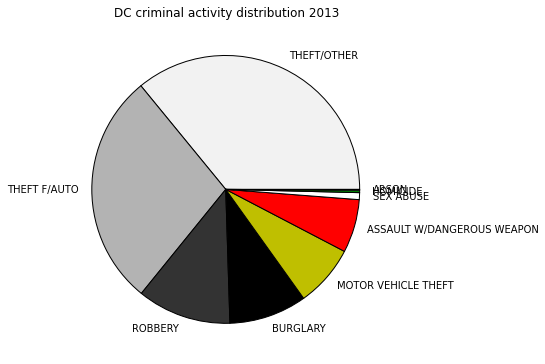

In [13]:
#The first issue I will address is about the representation of each offence during the year 2013.

df.Offenses.value_counts().plot(kind='pie', title="DC criminal activity distribution 2013", figsize=(6, 6),labeldistance=1.1, pctdistance=0.8, colors=['0.95','0.7','0.2','0','y','r','w','g'])
#plt.savefig("Figure1.jpg",dpi=300) # save as png

In [7]:
# Now we see as the offenses related with stealing of personal properties comprises the 92.4% of the crime incidents in DC. 
# while around a 0.3% of the offenses are homicides.


def calc_percent_per_offense(df):
    '''Calculates the distribution offense percentages per year'''
    total=df.Offenses.value_counts().sum()
    percent_df=pd.DataFrame({'Percentage_%':((df.Offenses.value_counts()/total)*100)})
    return percent_df

ofenses_rate_2013=calc_percent_per_offense(df)
#substracting_offenses=
ofenses_rate_2013


,Percentage_%
THEFT/OTHER,35.923223
THEFT F/AUTO,28.228772
ROBBERY,11.346668
BURGLARY,9.385447
MOTOR VEHICLE THEFT,7.457655
ASSAULT W/DANGEROUS WEAPON,6.438043
SEX ABUSE,0.832962
HOMICIDE,0.289726
ARSON,0.097504


In [8]:
# Lets see what was the probability of NOT being affected by any type of crime
# for a person who lived in DC the whole 2013.
# Define the random variable X: to be 100% safe in DC, and Y: to be attacked during 
# any of the 365 days of 2013 at any location inside of DC

# P(X)=1-P(Y)

#P(Y)=( number of outcomes / total number of possible outcomes )
# in our case:


# P(Y) = (number of crime reported incidents / total of DC inhabitants in 2013)
po2013=646449 #population_2013: https://es.wikipedia.org/wiki/Washington_D._C.
PY= df.Offenses.value_counts().sum() / po2013

# Then P(X)=1-P(Y)
PX=round((1-PY)*100,2)
PX



94.45

In [9]:
# Lets see what are the probabilities that any type of incident happend 
# to a person who is living at any place in the city during 365 days. 

def P_offense_type_2013(dataframe):
    '''calculates the probability that an inhabitant had during the 2013 
    of being involved in the different reported crimes'''
    OF=[]
    Probs=[]
    for i,j in zip(df.Offenses.value_counts().keys(),df.Offenses.value_counts()):
        OF.append(i)
        Probs.append(round((j/po2013)*100,2))
    probs_crime_types_df=pd.DataFrame({'Offenses':OF, 'Probability_%':Probs})
    return probs_crime_types_df

df1=P_offense_type_2013(df).set_index('Offenses')
#df1.sort(['Probability_%']).plot(kind='barh',color='0.60', stacked=True,title="Probability of crime in DC (2013)", figsize=(6, 6), legend=False, fontsize=14 )

P_offense_type_2013(df).set_index('Offenses')

,Probability_%
Offenses,
THEFT/OTHER,1.99
THEFT F/AUTO,1.57
ROBBERY,0.63
BURGLARY,0.52
MOTOR VEHICLE THEFT,0.41
ASSAULT W/DANGEROUS WEAPON,0.36
SEX ABUSE,0.05
HOMICIDE,0.02
ARSON,0.01


In [10]:
#So, each inhabitant had a 5.12% of chances of being hurted in 2013.

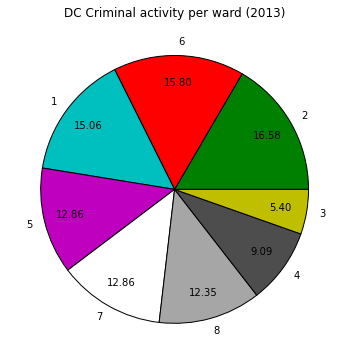

In [11]:
#Lets see now how are the reported incidents distributed along the 8 wards of DC.
df.Ward.value_counts().plot(kind='pie',title="DC Criminal activity per ward (2013)",figsize=(6, 6),autopct='%.2f',labeldistance=1.1, pctdistance=0.8, colors=['g','r','c','m','w','0.65','0.3','y'])
#plt.savefig("Figure2.png", dpi=300) # save as png

In [12]:
#QUESTION: 
#How many incidents were reported in each ward?

Ward1_df=df[df.Ward=='1']
Ward2_df=df[df.Ward=='2']
Ward3_df=df[df.Ward=='3']
Ward4_df=df[df.Ward=='4']
Ward5_df=df[df.Ward=='5']
Ward6_df=df[df.Ward=='6']
Ward7_df=df[df.Ward=='7']
Ward8_df=df[df.Ward=='8']

# Then the number of incidents per ward is:
num_off_ward1=Ward1_df.Offenses.value_counts().sum()
num_off_ward2=Ward2_df.Offenses.value_counts().sum()
num_off_ward3=Ward3_df.Offenses.value_counts().sum()
num_off_ward4=Ward4_df.Offenses.value_counts().sum()
num_off_ward5=Ward5_df.Offenses.value_counts().sum()
num_off_ward6=Ward6_df.Offenses.value_counts().sum()
num_off_ward7=Ward7_df.Offenses.value_counts().sum()
num_off_ward8=Ward8_df.Offenses.value_counts().sum()

# List with the resulting number of crimes reported per ward.
num_offs=[num_off_ward1,num_off_ward2,num_off_ward3,num_off_ward4,num_off_ward5,num_off_ward6,num_off_ward7,num_off_ward8]

# Mean of crimes per ward
num_offs_mean=np.mean(num_offs)

In [207]:
#QUESTION: 
# What is the probability being attacked per ward?


#First we need to know the 2013 population by ward
# To be consistent the sum of the population by ward should be equal to the DC population 646449(2013),
# The 2014 population data has been scraped from https://suburbanstats.org/population/washington-dc/list-of-counties-and-cities-in-washington-dc

p2010=[74462,76883,78887,75773,74308,76000,71748,73662]
p2011=[]
p2012=[]
p2013=[]
p2014=[76197,79915,77152,75773,74308,76598,71068,70712]

#This is what we have initially.
#print (sum(p2010),sum(p2014))
#Curiously the total population was the same in 2010 and 2014.


# we need need to calculate the slope an b and then estimate the values per each year -> (y-y0)=a(x-x0)+b
for i,j in zip(p2014,p2010): 
    a=((i-j)/4)  #  x0=2010, x=2014 --> x-x0=4
    b=j
    p2011.append(a*1+b)
    p2012.append(a*2+b)
    p2013.append(a*3+b)

years=[2010,2011,2012,2013,2014]


popi_wards=pd.DataFrame({"Wards":wards,"Y2010":p2010,"Y2011":p2011,"Y2012":p2012,"Y2013":p2013,"Y2014":p2014})
popi_wards.set_index('Wards')#.stack()

,Y2010,Y2011,Y2012,Y2013,Y2014
Wards,,,,,
Ward1,74462,74895.75,75329.5,75763.25,76197
Ward2,76883,77641.00,78399.0,79157.00,79915
Ward3,78887,78453.25,78019.5,77585.75,77152
Ward4,75773,75773.00,75773.0,75773.00,75773
Ward5,74308,74308.00,74308.0,74308.00,74308
Ward6,76000,76149.50,76299.0,76448.50,76598
Ward7,71748,71578.00,71408.0,71238.00,71068
Ward8,73662,72924.50,72187.0,71449.50,70712


In [211]:

#calculate the p
popu_per_ward=[Ward1_popu2010,Ward2_popu2010,Ward3_popu2010,Ward4_popu2010,Ward5_popu2010,Ward6_popu2010,Ward7_popu2010,Ward8_popu2010]
#P_Ward1=Ward1_df.Offenses.value_counts().sum()/Ward1_popu2010

def under_attack_P(dataframe,Ward_population):
    '''calculates the probability that an inhabitant of a given ward had during the 2013'''
    prob=round((dataframe.Offenses.value_counts().sum()/Ward_population)*100,2)
    return prob

P_Ward1=under_attack_P(Ward1_df,p2013[0])
P_Ward2=under_attack_P(Ward2_df,p2013[1])
P_Ward3=under_attack_P(Ward3_df,p2013[2])
P_Ward4=under_attack_P(Ward4_df,p2013[3])
P_Ward5=under_attack_P(Ward5_df,p2013[4])
P_Ward6=under_attack_P(Ward6_df,p2013[5])
P_Ward7=under_attack_P(Ward7_df,p2013[6])
P_Ward8=under_attack_P(Ward8_df,p2013[7])

prob_offs=[P_Ward1,P_Ward2,P_Ward3,P_Ward4,P_Ward5,P_Ward6,P_Ward7,P_Ward8]


In [212]:
# The distribution of criminality and the probabilities calculated are summarized bellow:
wards=['Ward1','Ward2','Ward3','Ward4','Ward5','Ward6','Ward7','Ward8']
per_ward_data=pd.DataFrame({'Wards':wards,'Population':p2013, 'Number of incidents':num_offs, 'Prob_of_any_incident':prob_offs})
#per_ward_data=pd.DataFrame({'Wards':wards,'Population':popu_per_ward, 'Number of incidents':num_offs, 'Mean of incident number':num_offs_mean, 'Prob_of_any_incident':prob_offs})


prob_mean=round(np.mean(per_ward_data.Prob_of_any_incident),2)
prob_means=list(itertools.repeat(prob_mean, 8))
prob_df=pd.DataFrame({'Prob_mean':prob_means, 'Wards': wards})

Ward_data=pd.merge(per_ward_data, prob_df)
#Ward_data.set_index('Wards')
per_ward_data.set_index('Wards')

,Number of incidents,Population,Prob_of_any_incident
Wards,,,
Ward1,5407,75763.25,7.14
Ward2,5953,79157.00,7.52
Ward3,1938,77585.75,2.50
Ward4,3263,75773.00,4.31
Ward5,4616,74308.00,6.21
Ward6,5670,76448.50,7.42
Ward7,4615,71238.00,6.48
Ward8,4434,71449.50,6.21


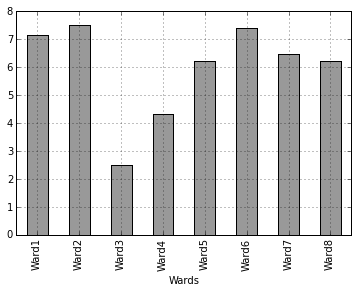

In [213]:
Ward_data.set_index('Wards').Prob_of_any_incident .plot(kind='bar',color='0.6')  
#plt.savefig("Figure3.png", dpi=300) # save as png

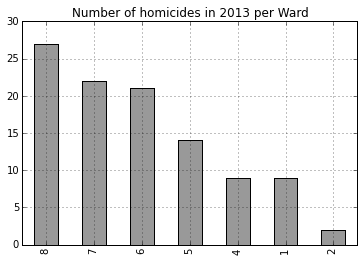

In [214]:
# Notice that Wards 3 and 4 have the lower probability of something 
# wrong happend to a person that lived in DC along the whole 2013. 

# Question:
# Where was the ward with a lower number or homicides? and with less auto theft?

fig1= df[df.Offenses=='HOMICIDE'].Ward.value_counts().plot('bar',color='0.6',title='Number of homicides in 2013 per Ward')
#plt.savefig("Figure4.png", dpi=300) # save as png

In [215]:
# The ward3 does not apear in the barplot as there was not reported homicides in this area. 
# What about auto theft?

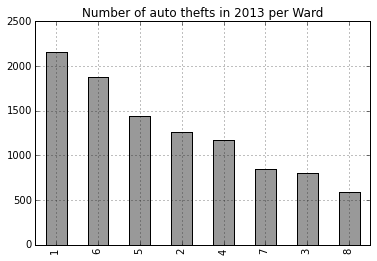

In [216]:
fig2=df[df.Offenses=='THEFT F/AUTO'].Ward.value_counts().plot('bar',color='0.6',title='Number of auto thefts in 2013 per Ward ')
#plt.savefig("Figure5.png",dpi=300) # save as png

In [20]:
# The wards 3,7, and 8 were the areas with a lower number of auto theft while the ward 1 shown the highest. 


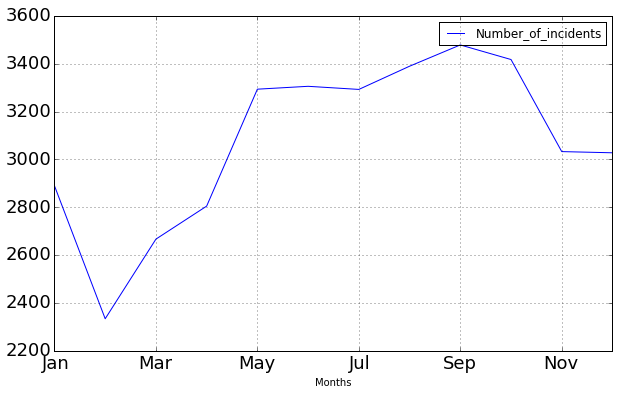

In [217]:
# Lets see now what are the worse months of the year in terms of crime:
df['Reported_Date'] = df['Reported_Date'].astype('datetime64[ns]')
df_dates=df.set_index('Reported_Date')
df_dates.head()
Jan = df_dates.ix['2013-01-01':'2013-02-01'].Offenses.value_counts().sum()
Feb = df_dates.ix['2013-02-01':'2013-03-01'].Offenses.value_counts().sum()
Mar = df_dates.ix['2013-03-01':'2013-04-01'].Offenses.value_counts().sum()
Apr = df_dates.ix['2013-04-01':'2013-05-01'].Offenses.value_counts().sum()
May = df_dates.ix['2013-05-01':'2013-06-01'].Offenses.value_counts().sum()
Jun = df_dates.ix['2013-06-01':'2013-07-01'].Offenses.value_counts().sum()
Jul = df_dates.ix['2013-07-01':'2013-08-01'].Offenses.value_counts().sum()
Aug = df_dates.ix['2013-08-01':'2013-09-01'].Offenses.value_counts().sum()
Sep = df_dates.ix['2013-09-01':'2013-10-01'].Offenses.value_counts().sum()
Oct = df_dates.ix['2013-10-01':'2013-11-01'].Offenses.value_counts().sum()
Nov = df_dates.ix['2013-11-01':'2013-12-01'].Offenses.value_counts().sum()
Dic = df_dates.ix['2013-12-01':'2013-12-31'].Offenses.value_counts().sum()
months=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dic']
incidents_month=[Jan,Feb,Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dic]
month_df=pd.DataFrame({'Months':months, 'Number_of_incidents':incidents_month})
month_df.set_index('Months').plot(figsize=(10, 6),fontsize=18)

#plt.savefig("Figure6.png", dpi=300) # save as png

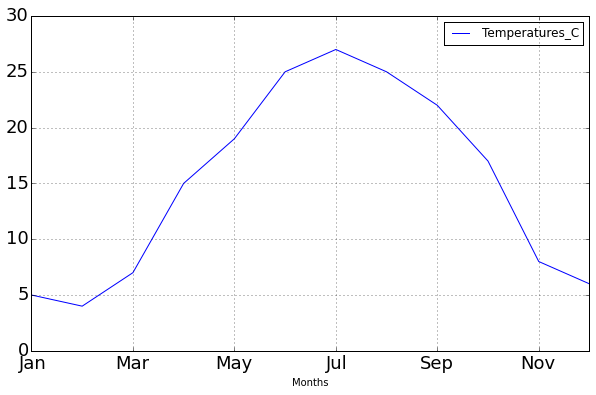

In [22]:
# It is clear that in the colder months the number of reported incidents decrease notably.
# Lets check it by scraping the mean temperatures per month of 2013
Temps=[5,4,7,15,19,25,27,25,22,17,8,6] # taken from: http://www.wunderground.com/history/airport/KDCA/2013/12/1/MonthlyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
tempe_df=pd.DataFrame({'Months':months, 'Temperatures_C':Temps})
tempe_df.set_index('Months').plot(figsize=(10, 6),fontsize=18)


#plt.savefig("Figure7.png",dpi=300) # save as png


In [23]:
# Definitively here seems to be a possible correlation between colder weather and criminal activity. Lets check it.

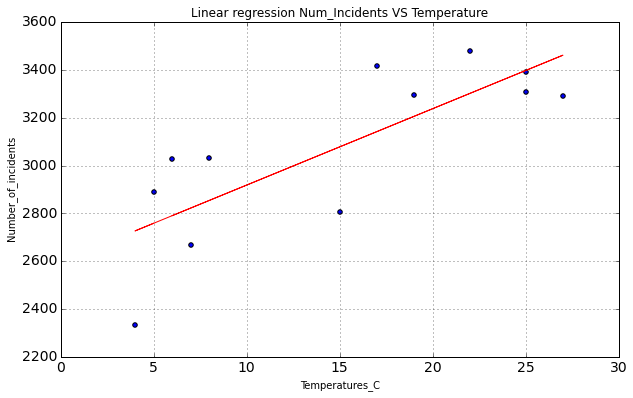

In [24]:
from scipy.interpolate import *
from scipy.stats import *
from numpy import *

regresion= pd.merge(month_df,tempe_df)
regresion.set_index('Months').plot( kind='Scatter', x='Temperatures_C',y='Number_of_incidents',
                                   figsize=(10, 6), title='Linear regression Num_Incidents VS Temperature',
                                   fontsize=14)
plt.plot()
X=regresion.Temperatures_C
Y=regresion.Number_of_incidents 
 
p1=polyfit(X,Y,1)
plt.plot(X,polyval(p1,X),color='r')

plt.savefig("Figure8.png",dpi=300) # save as png

In [25]:
# Now we want to know how good is our adjustment by looking the r square value. 
slope,intercept,r_value,p_value,std_err=linregress(X,Y)

print round((pow(r_value,2)),2)

0.62


In [26]:
# The correlation exists but is not so good. Lets see now the temperatures 
# at which the number of incidents are above the average:
regresion[regresion.Number_of_incidents>np.mean(regresion.Number_of_incidents)].set_index('Months')

,Number_of_incidents,Temperatures_C
Months,,
May,3294,19
Jun,3306,25
Jul,3293,27
Aug,3390,25
Sep,3479,22
Oct,3418,17


In [27]:
# and the same for those bellow the mean:
regresion[regresion.Number_of_incidents<np.mean(regresion.Number_of_incidents)].set_index('Months')

,Number_of_incidents,Temperatures_C
Months,,
Jan,2890,5
Feb,2334,4
Mar,2667,7
Apr,2805,15
Nov,3033,8
Dic,3028,6


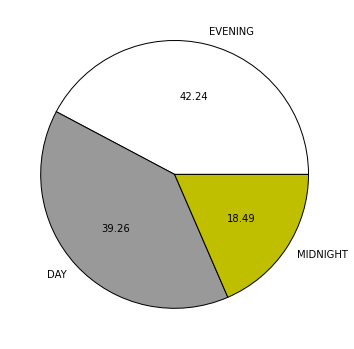

In [28]:
# Although the linear regression is not good enough to stablish a linear correlation, 
# the two last tables show as in the months with an average temperature higher than 15 degrees 
# were registered more incidents than in those colder.

# Lets see now which is the shift of the day with a higher cirminal activity reported:
df.Shifts.value_counts().plot(kind='pie',figsize=(6,6),colors=('w','0.6','y'),autopct='%.2f')
#plt.savefig("Figure9.png",dpi=300) # save as png

In [29]:
# And surprisingly the night shift is not the turn with more registered complaints of crime. 

In [30]:
# Finally, lets see Which streets were most requested by criminals:

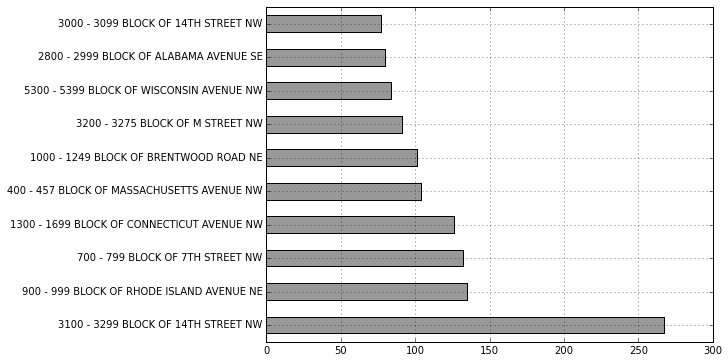

In [31]:
df.Street.value_counts().head(10).plot('barh',figsize=(8,6),color='0.6')

#plt.savefig("Figure10.png", dpi=300) # save as png

In [87]:
import urllib2
from BeautifulSoup import BeautifulSoup



In [81]:
#From street adresses to coordinates
from geopy.geocoders import Nominatim

#Select the 
streets=[]
coordinates=[]





def geolocalizator(street_name):
    geolocator = Nominatim()
    location = geolocator.geocode(street_name)
    return streets.append(street_name),coordinates.append((location.latitude, location.longitude))




AttributeError: 'NoneType' object has no attribute 'latitude'

In [83]:
a= df.Street.unique()
S=[]
for i in a:
    if 'AND' in i:
        print i


900 - 999 BLOCK OF RHODE ISLAND AVENUE NE
200 - 299 BLOCK OF RHODE ISLAND AVENUE NW
OKIE STREET NE AND FENWICK STREET NE
OLD MORGAN SCHOOL PLACE NW AND ONTARIO ROAD NW
1700 - 1799 BLOCK OF RHODE ISLAND AVENUE NW
I STREET NE AND 3RD STREET NE
Q STREET NW AND 18TH STREET NW
CORCORAN STREET NW AND 14TH STREET NW
A STREET SE AND 8TH STREET SE
43RD ROAD NE AND BENNING ROAD NE
CHURCH STREET NW AND 17TH STREET NW
1400 - 1499 BLOCK OF RHODE ISLAND AVENUE NE
9TH STREET NW AND NEW YORK AVENUE NW
8TH STREET NE AND I STREET NE
I STREET SE AND 7TH STREET SE
H STREET NW AND 14TH STREET NW
PRINCETON PLACE NW AND GEORGIA AVENUE NW
42ND STREET NW AND ALBEMARLE STREET NW
COLUMBIA ROAD NW AND MOZART PLACE NW
9TH STREET NW AND P STREET NW
ARKANSAS AVENUE NW AND 16TH STREET NW
3700 - 3748 BLOCK OF CUMBERLAND STREET NW
9TH STREET NW AND O STREET NW
M STREET NW AND 5TH STREET NW
18TH STREET NW AND L STREET NW
N STREET NW AND 19TH STREET NW
KENNEDY STREET NW AND 8TH STREET NW
EATON ROAD SE AND FIRTH STERLING 

In [78]:
#how many different adresses were reported are in DC? 8956
#to simplify the problem I pick only up the name of the top30 
#streets avoiding the Block number and intersections.


#primero de todo 


In [ ]:
geolocalizator("OKIE STREET NE ")#AND FENWICK STREET NE


In [88]:
for i in df.Street.head(40):
    if ' AND ' in i:
        print i

OKIE STREET NE AND FENWICK STREET NE
OLD MORGAN SCHOOL PLACE NW AND ONTARIO ROAD NW
